In [55]:
import pandas as pd
from matplotlib import pyplot as plt

df=pd.read_csv('Titanic.csv')
df.head()
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [56]:
#convert sex to numeric value
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Sex_n']=le.fit_transform(df['Sex'])
df_n=df[['Survived','Pclass','Sex_n','Age','Fare', 'SibSp', 'Parch']]
df_n

,Survived,Pclass,Sex_n,Age,Fare,SibSp,Parch
0,0,3,1,22.0,7.2500,1,0
1,1,1,0,38.0,71.2833,1,0
2,1,3,0,26.0,7.9250,0,0
3,1,1,0,35.0,53.1000,1,0
4,0,3,1,35.0,8.0500,0,0
...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,0,0
887,1,1,0,19.0,30.0000,0,0
888,0,3,0,NaN,23.4500,1,2
889,1,1,1,26.0,30.0000,0,0


In [57]:
#get median age
import math
median_age=math.floor(df['Age'].mean())
median_age
#fill NaN with median age;
df_n['Age']=df_n.Age.fillna(median_age)
df_n

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Survived,Pclass,Sex_n,Age,Fare,SibSp,Parch
0,0,3,1,22.0,7.2500,1,0
1,1,1,0,38.0,71.2833,1,0
2,1,3,0,26.0,7.9250,0,0
3,1,1,0,35.0,53.1000,1,0
4,0,3,1,35.0,8.0500,0,0
...,...,...,...,...,...,...,...
886,0,2,1,27.0,13.0000,0,0
887,1,1,0,19.0,30.0000,0,0
888,0,3,0,29.0,23.4500,1,2
889,1,1,1,26.0,30.0000,0,0


In [58]:
# check the mean value for survived vs non survived
df_n.groupby('Survived').mean()
df_n.groupby('Pclass').mean()['Survived']
df_n.groupby('Sex_n').mean()['Survived']
df_n.groupby('SibSp').mean()['Survived']

SibSp
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5    0.000000
8    0.000000
Name: Survived, dtype: float64

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import math as math

y=df_n.Survived
x=df_n.drop('Survived', axis=1)
x
train_x, test_x, train_y, test_y=train_test_split(x, y, test_size=0.33, random_state=40)

from scipy.stats import pearsonr
corr, _ =pearsonr(x.Age, y)
print('pearson correlation between age and survived: %.3f' %  corr)
corr, _ =pearsonr(x.Sex_n, y)
print('pearson correlation between sex and survived: %.3f' %  corr)
corr, _ =pearsonr(x.Pclass, y)
print('pearson correlation between Pclass and survived: %.3f' %  corr)
corr, _ =pearsonr(x.Fare, y)

pearson correlation between age and survived: -0.068
pearson correlation between sex and survived: -0.543
pearson correlation between Pclass and survived: -0.338


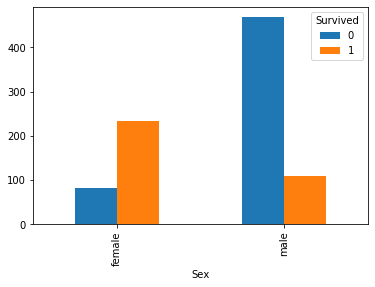

In [60]:
#plot bar chart for sex and survived
pd.crosstab(df.Sex, df.Survived).plot(kind='bar')

In [84]:
model=LogisticRegression()
model.fit(train_x, train_y)
model.score(test_x, test_y)
y_pred=model.predict_proba(test_x)[:,1]
df1=pd.DataFrame({'Actual': test_y, 'Predicted': y_pred})

#calculate MSE
MSE=metrics.mean_squared_error(test_y, y_pred)
#calculate RMSE
math.sqrt(MSE)
#calculate MAE
MAE=metrics.mean_absolute_error(test_y, y_pred)
#calculate R-square
r2=metrics.r2_score(test_y, y_pred)
print(r2)
#calculate auc score
auc_score=metrics.roc_auc_score(test_y, y_pred)
print(auc_score)



0.4381809537440515
0.8824407628587941


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Text(0.5, 0, 'False Positive Rate')

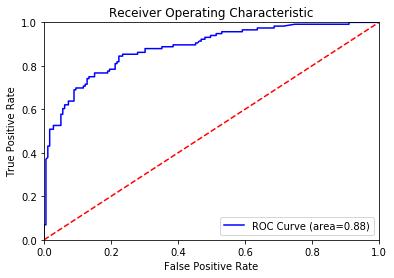

In [86]:
#plot ROC curve
fpr, tpr, threshold=metrics.roc_curve(test_y, y_pred)
roc_auc=metrics.auc(fpr, tpr)
plt.title ("Receiver Operating Characteristic")
plt.plot(fpr, tpr, 'b', label='ROC Curve (area=%0.2f)'% auc_score)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



In [63]:
#try decision tree model
from sklearn.tree import DecisionTreeClassifier
model_tree=DecisionTreeClassifier()
model_tree.fit(train_x, train_y)
model_tree.score(test_x, test_y)

0.7627118644067796

In [69]:
from sklearn.ensemble import  RandomForestClassifier
model_rf=RandomForestClassifier()
model_rf.fit(train_x, train_y)
model_rf.score(test_x, test_y)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8101694915254237

In [67]:
from sklearn.neural_network import MLPClassifier
model_nn=MLPClassifier()
model_nn.fit(train_x, train_y)
model_nn.score(test_x, test_y)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8135593220338984

In [71]:
from sklearn.ensemble import GradientBoostingClassifier
model_gb=GradientBoostingClassifier()
model_gb.fit(train_x, train_y)
model_gb.score(test_x, test_y)

0.8508474576271187